In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break
    break

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd 
import numpy as np 
import cv2
import PIL
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import glob
import random
import os
from os import listdir
random.seed(100)
np.random.seed(100)

In [4]:
dicom_data = pd.read_csv(r'DataSet/csv/dicom_info.csv')
dicom_data

file_path  \
0      CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...   
1      CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...   
2      CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...   
3      CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
4      CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
...                                                  ...   
10232  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.62798...   
10233  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.82451...   
10234  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24759...   
10235  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.28513...   
10236  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.28513...   

                                              image_path  AccessionNumber  \
0      CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...              NaN   
1      CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...              NaN   
2      CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...              NaN   
3      CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   
4      CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   
...                                                  ...              ...   
10232  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.627982...              NaN   
10233  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.824512...              NaN   
10234  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.247594...              NaN   
10235  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.285138...              NaN   
10236  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.285138...              NaN   

       BitsAllocated  BitsStored BodyPartExamined  Columns  ContentDate  \
0                 16          16           BREAST      351     20160426   
1                 16          16           BREAST     3526     20160426   
2                 16          16           BREAST     1546     20160503   
3                 16          16           BREAST       97     20160503   
4                  8           8      Left Breast     3104     20160503   
...              ...         ...              ...      ...          ...   
10232              8           8           BREAST     3744     20160503   
10233             16          16           BREAST     3316     20160426   
10234             16          16           BREAST     2712     20160426   
10235              8           8           BREAST     2736     20160426   
10236             16          16           BREAST      686     20160426   

       ContentTime ConversionType  ...  \
0       131732.685            WSD  ...   
1       143829.101            WSD  ...   
2       111956.298            WSD  ...   
3       115347.770            WSD  ...   
4       115347.770            WSD  ...   
...            ...            ...  ...   
10232   134238.422            WSD  ...   
10233   123905.617            WSD  ...   
10234   134551.632            WSD  ...   
10235   110906.969            WSD  ...   
10236   110906.969            WSD  ...   

       SecondaryCaptureDeviceManufacturerModelName      SeriesDescription  \
0                                           MATLAB         cropped images   
1                                           MATLAB  full mammogram images   
2                                           MATLAB  full mammogram images   
3                                           MATLAB         cropped images   
4                                           MATLAB                    NaN   
...                                            ...                    ...   
10232                                       MATLAB        ROI mask images   
10233                                       MATLAB  full mammogram images   
10234                                       MATLAB  full mammogram images   
10235                                       MATLAB        ROI mask images   
10236                                       MATLAB         cropped images   

                                       SeriesInstanceUID SeriesNumber 

In [5]:
dicom_data.head()


file_path  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   

                                          image_path  AccessionNumber  \
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...              NaN   
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...              NaN   
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...              NaN   
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   

   BitsAllocated  BitsStored BodyPartExamined  Columns  ContentDate  \
0             16          16           BREAST      351     20160426   
1             16          16           BREAST     3526     20160426   
2             16          16           BREAST     1546     20160503   
3             16          16           BREAST       97     20160503   
4              8           8      Left Breast     3104     20160503   

   ContentTime ConversionType  ...  \
0   131732.685            WSD  ...   
1   143829.101            WSD  ...   
2   111956.298            WSD  ...   
3   115347.770            WSD  ...   
4   115347.770            WSD  ...   

   SecondaryCaptureDeviceManufacturerModelName      SeriesDescription  \
0                                       MATLAB         cropped images   
1                                       MATLAB  full mammogram images   
2                                       MATLAB  full mammogram images   
3                                       MATLAB         cropped images   
4                                       MATLAB                    NaN   

                                   SeriesInstanceUID SeriesNumber  \
0  1.3.6.1.4.1.9590.100.1.2.129308726812851964007...            1   
1  1.3.6.1.4.1.9590.100.1.2.248386742010678582309...            1   
2  1.3.6.1.4.1.9590.100.1.2.267213171011171858918...            1   
3  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   
4  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   

  SmallestImagePixelValue  SpecificCharacterSet   StudyDate StudyID  \
0                   23078            ISO_IR 100  20160720.0    DDSM   
1                       0            ISO_IR 100  20160720.0    DDSM   
2                       0            ISO_IR 100  20160807.0    DDSM   
3                   32298            ISO_IR 100  20170829.0    DDSM   
4                       0            ISO_IR 100         NaN    DDSM   

                                    StudyInstanceUID  StudyTime  
0  1.3.6.1.4.1.9590.100.1.2.271867287611061855725...   214951.0  
1  1.3.6.1.4.1.9590.100.1.2.161516517311681906612...   193426.0  
2  1.3.6.1.4.1.9590.100.1.2.291043622711253836701...   161814.0  
3  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...   180109.0  
4  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...        NaN  

[5 rows x 38 columns]

In [6]:
cropped_images=dicom_data[dicom_data.SeriesDescription == 'cropped images'].image_path
cropped_images.head()

0     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
10    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
Name: image_path, dtype: object

In [7]:
image_dir = 'DataSet/jpeg'

In [8]:
cropped_images = cropped_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
cropped_images.head()

0     DataSet/jpeg/1.3.6.1.4.1.9590.100.1.2.12930872...
3     DataSet/jpeg/1.3.6.1.4.1.9590.100.1.2.38118736...
6     DataSet/jpeg/1.3.6.1.4.1.9590.100.1.2.15333905...
7     DataSet/jpeg/1.3.6.1.4.1.9590.100.1.2.17899471...
10    DataSet/jpeg/1.3.6.1.4.1.9590.100.1.2.41183349...
Name: image_path, dtype: object

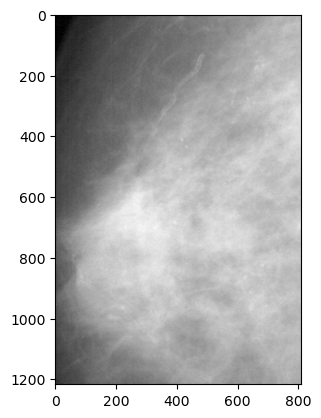

In [9]:
for file  in cropped_images[0:5]:
    cropped_images_show = PIL.Image.open(file)
    gray_img= cropped_images_show.convert("L")
    plt.imshow(gray_img, cmap='gray')

In [10]:
full_mammogram_images=dicom_data[dicom_data.SeriesDescription == 'full mammogram images'].image_path
full_mammogram_images.head()

1     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...
2     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...
11    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.210396...
12    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.749566...
15    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.987658...
Name: image_path, dtype: object

In [11]:
full_mammogram_images = full_mammogram_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
full_mammogram_images[1]

'DataSet/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg'

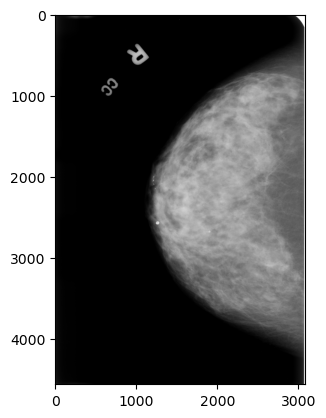

In [12]:
for file  in full_mammogram_images[0:5]:    
    full_mammogram_images_show = PIL.Image.open(file)
    gray_img= full_mammogram_images_show.convert("L")
    plt.imshow(gray_img, cmap='gray')

In [13]:
ROI_mask_images=dicom_data[dicom_data.SeriesDescription == 'ROI mask images'].image_path
ROI_mask_images.head()

5     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
8     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
9     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
14    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.236373...
20    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.357008...
Name: image_path, dtype: object

In [14]:
ROI_mask_images = ROI_mask_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
ROI_mask_images.head()

5     DataSet/jpeg/1.3.6.1.4.1.9590.100.1.2.15333905...
8     DataSet/jpeg/1.3.6.1.4.1.9590.100.1.2.17899471...
9     DataSet/jpeg/1.3.6.1.4.1.9590.100.1.2.41183349...
14    DataSet/jpeg/1.3.6.1.4.1.9590.100.1.2.23637354...
20    DataSet/jpeg/1.3.6.1.4.1.9590.100.1.2.35700805...
Name: image_path, dtype: object

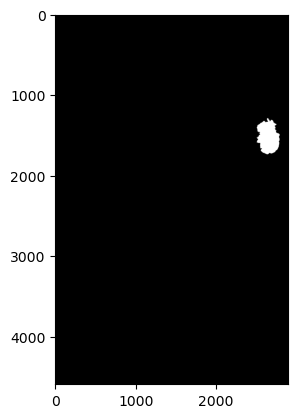

In [15]:
for file  in ROI_mask_images[0:5]:
    ROI_mask_images_show = PIL.Image.open(file)
    gray_img= ROI_mask_images_show.convert("L")
    plt.imshow(gray_img, cmap='gray')

In [16]:
data_1=pd.read_csv('DataSet/csv/calc_case_description_train_set.csv')
data_1.head()

patient_id  breast density left or right breast image view  abnormality id  \
0    P_00005               3                RIGHT         CC               1   
1    P_00005               3                RIGHT        MLO               1   
2    P_00007               4                 LEFT         CC               1   
3    P_00007               4                 LEFT        MLO               1   
4    P_00008               1                 LEFT         CC               1   

  abnormality type    calc type calc distribution  assessment  \
0    calcification    AMORPHOUS         CLUSTERED           3   
1    calcification    AMORPHOUS         CLUSTERED           3   
2    calcification  PLEOMORPHIC            LINEAR           4   
3    calcification  PLEOMORPHIC            LINEAR           4   
4    calcification          NaN          REGIONAL           2   

                 pathology  subtlety  \
0                MALIGNANT         3   
1                MALIGNANT         3   
2                   BENIGN         4   
3                   BENIGN         4   
4  BENIGN_WITHOUT_CALLBACK         3   

                                     image file path  \
0  Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...   
1  Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...   
2  Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...   
3  Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...   
4  Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...   

                             cropped image file path  \
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...   

                                  ROI mask file path  
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...  
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....  
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...

In [17]:
data_2=pd.read_csv('DataSet/csv/mass_case_description_train_set.csv')
data_2.head()

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT        MLO               1   
2    P_00004               3                 LEFT         CC               1   
3    P_00004               3                 LEFT        MLO               1   
4    P_00004               3                RIGHT        MLO               1   

  abnormality type                          mass shape   mass margins  \
0             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
2             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
3             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
4             mass                                OVAL  CIRCUMSCRIBED   

   assessment  pathology  subtlety  \
0           4  MALIGNANT         4   
1           4  MALIGNANT         4   
2           4     BENIGN         3   
3           4     BENIGN         3   
4           4     BENIGN         5   

                                     image file path  \
0  Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...   
1  Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...   
2  Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...   
3  Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...   
4  Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...   

                             cropped image file path  \
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...   
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...   
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....   

                                  ROI mask file path  
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...  
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...  
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....

In [18]:
data_2.describe()

breast_density  abnormality id   assessment     subtlety
count     1318.000000     1318.000000  1318.000000  1318.000000
mean         2.203338        1.116085     3.504552     3.965857
std          0.873774        0.467013     1.414609     1.102032
min          1.000000        1.000000     0.000000     0.000000
25%          2.000000        1.000000     3.000000     3.000000
50%          2.000000        1.000000     4.000000     4.000000
75%          3.000000        1.000000     4.000000     5.000000
max          4.000000        6.000000     5.000000     5.000000

In [19]:
dicom_cleaning_data = dicom_data.copy()
dicom_cleaning_data.head()

file_path  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   

                                          image_path  AccessionNumber  \
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...              NaN   
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...              NaN   
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...              NaN   
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   

   BitsAllocated  BitsStored BodyPartExamined  Columns  ContentDate  \
0             16          16           BREAST      351     20160426   
1             16          16           BREAST     3526     20160426   
2             16          16           BREAST     1546     20160503   
3             16          16           BREAST       97     20160503   
4              8           8      Left Breast     3104     20160503   

   ContentTime ConversionType  ...  \
0   131732.685            WSD  ...   
1   143829.101            WSD  ...   
2   111956.298            WSD  ...   
3   115347.770            WSD  ...   
4   115347.770            WSD  ...   

   SecondaryCaptureDeviceManufacturerModelName      SeriesDescription  \
0                                       MATLAB         cropped images   
1                                       MATLAB  full mammogram images   
2                                       MATLAB  full mammogram images   
3                                       MATLAB         cropped images   
4                                       MATLAB                    NaN   

                                   SeriesInstanceUID SeriesNumber  \
0  1.3.6.1.4.1.9590.100.1.2.129308726812851964007...            1   
1  1.3.6.1.4.1.9590.100.1.2.248386742010678582309...            1   
2  1.3.6.1.4.1.9590.100.1.2.267213171011171858918...            1   
3  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   
4  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   

  SmallestImagePixelValue  SpecificCharacterSet   StudyDate StudyID  \
0                   23078            ISO_IR 100  20160720.0    DDSM   
1                       0            ISO_IR 100  20160720.0    DDSM   
2                       0            ISO_IR 100  20160807.0    DDSM   
3                   32298            ISO_IR 100  20170829.0    DDSM   
4                       0            ISO_IR 100         NaN    DDSM   

                                    StudyInstanceUID  StudyTime  
0  1.3.6.1.4.1.9590.100.1.2.271867287611061855725...   214951.0  
1  1.3.6.1.4.1.9590.100.1.2.161516517311681906612...   193426.0  
2  1.3.6.1.4.1.9590.100.1.2.291043622711253836701...   161814.0  
3  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...   180109.0  
4  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...        NaN  

[5 rows x 38 columns]

In [20]:
dicom_cleaning_data.drop(['PatientBirthDate','AccessionNumber','Columns','ContentDate','ContentTime','PatientSex','PatientBirthDate',
                                                'ReferringPhysicianName','Rows','SOPClassUID','SOPInstanceUID',
                                                'StudyDate','StudyID','StudyInstanceUID','StudyTime','InstanceNumber','SeriesInstanceUID','SeriesNumber'],axis =1, inplace=True)
dicom_cleaning_data.isna().sum()

file_path                                        0
image_path                                       0
BitsAllocated                                    0
BitsStored                                       0
BodyPartExamined                                 0
ConversionType                                   0
HighBit                                          0
LargestImagePixelValue                           0
Laterality                                     566
Modality                                         0
PatientID                                        0
PatientName                                      0
PatientOrientation                               0
PhotometricInterpretation                        0
PixelRepresentation                              0
SamplesPerPixel                                  0
SecondaryCaptureDeviceManufacturer               0
SecondaryCaptureDeviceManufacturerModelName      0
SeriesDescription                              566
SmallestImagePixelValue        

In [21]:
dicom_cleaning_data['SeriesDescription'].fillna(method = 'bfill', axis = 0, inplace=True)
dicom_cleaning_data['Laterality'].fillna(method = 'bfill', axis = 0, inplace=True)
dicom_cleaning_data.isna().sum()

C:\Users\aarya\AppData\Local\Temp\ipykernel_1912\2530511600.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dicom_cleaning_data['SeriesDescription'].fillna(method = 'bfill', axis = 0, inplace=True)
C:\Users\aarya\AppData\Local\Temp\ipykernel_1912\2530511600.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dicom_cleaning_data['Laterality'].fillna(method = 'bfill', axis = 0, inplace=True)


file_path                                      0
image_path                                     0
BitsAllocated                                  0
BitsStored                                     0
BodyPartExamined                               0
ConversionType                                 0
HighBit                                        0
LargestImagePixelValue                         0
Laterality                                     0
Modality                                       0
PatientID                                      0
PatientName                                    0
PatientOrientation                             0
PhotometricInterpretation                      0
PixelRepresentation                            0
SamplesPerPixel                                0
SecondaryCaptureDeviceManufacturer             0
SecondaryCaptureDeviceManufacturerModelName    0
SeriesDescription                              0
SmallestImagePixelValue                        0
SpecificCharacterSet

In [22]:
Data_cleaning_1 = data_1.copy()

In [23]:
Data_cleaning_1 = Data_cleaning_1.rename(columns={'calc type':'calc_type'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'calc distribution':'calc_distribution'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'image view':'image_view'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'left or right breast':'left_or_right_breast'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'breast density':'breast_density'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'abnormality type':'abnormality_type'})

In [24]:
Data_cleaning_1['pathology'] = Data_cleaning_1['pathology'].astype('category')
Data_cleaning_1['calc_type'] = Data_cleaning_1['calc_type'].astype('category')
Data_cleaning_1['calc_distribution'] = Data_cleaning_1['calc_distribution'].astype('category')
Data_cleaning_1['abnormality_type'] = Data_cleaning_1['abnormality_type'].astype('category')
Data_cleaning_1['image_view'] = Data_cleaning_1['image_view'].astype('category')
Data_cleaning_1['left_or_right_breast'] = Data_cleaning_1['left_or_right_breast'].astype('category')

Data_cleaning_1.isna().sum()

patient_id                   0
breast_density               0
left_or_right_breast         0
image_view                   0
abnormality id               0
abnormality_type             0
calc_type                   20
calc_distribution          376
assessment                   0
pathology                    0
subtlety                     0
image file path              0
cropped image file path      0
ROI mask file path           0
dtype: int64

In [25]:
Data_cleaning_1['calc_type'].fillna(method = 'bfill', axis = 0, inplace=True) 
Data_cleaning_1['calc_distribution'].fillna(method = 'bfill', axis = 0, inplace=True)

Data_cleaning_1.isna().sum()

C:\Users\aarya\AppData\Local\Temp\ipykernel_1912\3045191150.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_cleaning_1['calc_type'].fillna(method = 'bfill', axis = 0, inplace=True)
C:\Users\aarya\AppData\Local\Temp\ipykernel_1912\3045191150.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_cleaning_1['calc_distribution'].fillna(method = 'bfill', axis = 0, inplace=True)


patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality id             0
abnormality_type           0
calc_type                  0
calc_distribution          0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
dtype: int64

In [26]:
Data_cleaning_2 = data_2.copy()

In [27]:
Data_cleaning_2 = Data_cleaning_2.rename(columns={'mass shape':'mass_shape'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'left or right breast':'left_or_right_breast'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'mass margins':'mass_margins'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'image view':'image_view'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'abnormality type':'abnormality_type'})
Data_cleaning_2['left_or_right_breast'] = Data_cleaning_2['left_or_right_breast'].astype('category')
Data_cleaning_2['image_view'] = Data_cleaning_2['image_view'].astype('category')
Data_cleaning_2['mass_margins'] = Data_cleaning_2['mass_margins'].astype('category')
Data_cleaning_2['mass_shape'] = Data_cleaning_2['mass_shape'].astype('category')
Data_cleaning_2['abnormality_type'] = Data_cleaning_2['abnormality_type'].astype('category')
Data_cleaning_2['pathology'] = Data_cleaning_2['pathology'].astype('category')
Data_cleaning_2['mass_shape'].fillna(method = 'bfill', axis = 0, inplace=True) 
Data_cleaning_2['mass_margins'].fillna(method = 'bfill', axis = 0, inplace=True)

Data_cleaning_2.isna().sum()

C:\Users\aarya\AppData\Local\Temp\ipykernel_1912\537664961.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_cleaning_2['mass_shape'].fillna(method = 'bfill', axis = 0, inplace=True)
C:\Users\aarya\AppData\Local\Temp\ipykernel_1912\537664961.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_cleaning_2['mass_margins'].fillna(method = 'bfill', axis = 0, inplace=True)


patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
dtype: int64

In [28]:
Data_cleaning_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   patient_id               1318 non-null   object  
 1   breast_density           1318 non-null   int64   
 2   left_or_right_breast     1318 non-null   category
 3   image_view               1318 non-null   category
 4   abnormality id           1318 non-null   int64   
 5   abnormality_type         1318 non-null   category
 6   mass_shape               1318 non-null   category
 7   mass_margins             1318 non-null   category
 8   assessment               1318 non-null   int64   
 9   pathology                1318 non-null   category
 10  subtlety                 1318 non-null   int64   
 11  image file path          1318 non-null   object  
 12  cropped image file path  1318 non-null   object  
 13  ROI mask file path       1318 non-null   object  
dtypes: categ

In [29]:
breast_img = glob.glob('DataSet/Breast Histopathology Images/IDC_regular_ps50_idx5/**/*.png', recursive = True)

In [30]:
for imgname in breast_img[:3]:
    print(imgname)

DataSet/Breast Histopathology Images/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1001_class0.png
DataSet/Breast Histopathology Images/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1051_class0.png
DataSet/Breast Histopathology Images/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1101_class0.png


In [31]:
non_can_img = []
can_img = []

for img in breast_img:
    if img[-5] == '0' :
        non_can_img.append(img)
    
    elif img[-5] == '1' :
        can_img.append(img)

In [32]:
non_can_num = len(non_can_img)  # No cancer
can_num = len(can_img)   # Cancer 
        
total_img_num = non_can_num + can_num
        
print('Number of Images of no cancer: {}' .format(non_can_num))   # images of Non cancer
print('Number of Images of cancer : {}' .format(can_num))   # images of cancer 
print('Total Number of Images : {}' .format(total_img_num))

Number of Images of no cancer: 198738
Number of Images of cancer : 78786
Total Number of Images : 277524


In [33]:
data_insight_1 = pd.DataFrame({'state of cancer' : ['0','1'],'Numbers of Patients' : [198738,78786]})
data_insight_1

state of cancer  Numbers of Patients
0               0               198738
1               1                78786

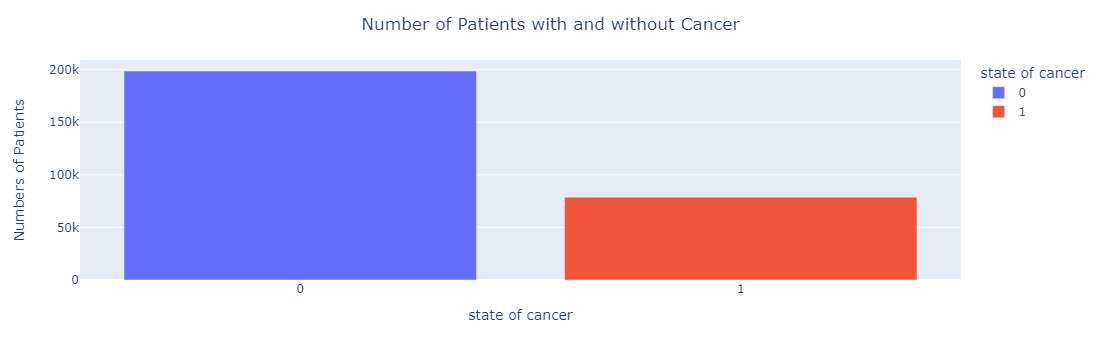

In [34]:
import plotly.express as px

# Define a custom color palette
colors = px.colors.qualitative.Plotly

# Create the bar chart
bar = px.bar(data_frame=data_insight_1, x='state of cancer', y='Numbers of Patients', color='state of cancer', color_discrete_sequence=colors)

# Update the layout with a title and center it
bar.update_layout(title_text='Number of Patients with and without Cancer', title_x=0.5)

# Show the bar chart
bar.show()


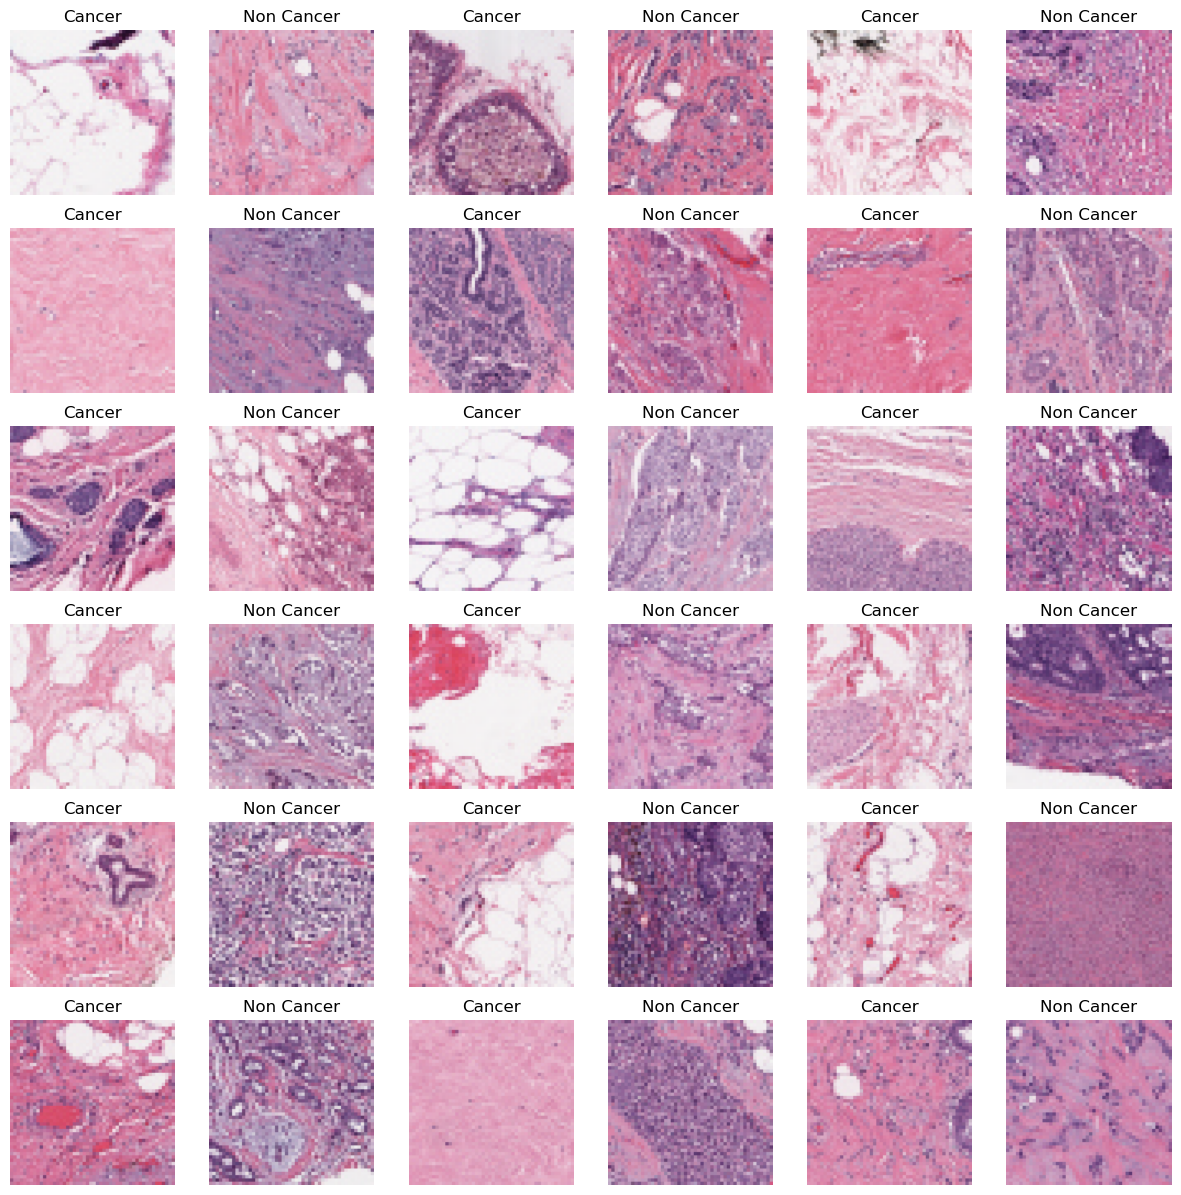

In [35]:
from keras.preprocessing import image

plt.figure(figsize = (15, 15))

some_non = np.random.randint(0, len(non_can_img), 18)
some_can = np.random.randint(0, len(can_img), 18)

s = 0
for num in some_non:
    
        img = image.load_img((non_can_img[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        
        plt.subplot(6, 6, 2*s+1)
        plt.axis('off')
        plt.title('Cancer')
        plt.imshow(img.astype('uint8'))
        s += 1
        
s = 1
for num in some_can:
    
        img = image.load_img((can_img[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        plt.subplot(6, 6, 2*s)
        plt.axis('off')        
        plt.title('Non Cancer')
        plt.imshow(img.astype('uint8'))
        s += 1

In [43]:
from matplotlib.image import imread
import cv2

some_non_img = random.sample(non_can_img, len(non_can_img))
some_can_img = random.sample(can_img, len(can_img))

non_img_arr = []
can_img_arr = []

for img in some_non_img:
        
    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    n_img_size = cv2.resize(n_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    non_img_arr.append([n_img_size, 0])
    
for img in some_can_img:
    
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    c_img_size = cv2.resize(c_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    can_img_arr.append([c_img_size, 1])

In [44]:
import random
import numpy as np

# Assuming non_img_arr and can_img_arr are already populated with consistent shapes

# Initialize lists for features and labels
X = []
y = []

# Combine non_img_arr and can_img_arr
breast_img_arr = non_img_arr + can_img_arr

# Shuffle the combined array
random.shuffle(breast_img_arr)

# Iterate over the combined array
for feature, label in breast_img_arr:
    # Append feature (image array) to X
    X.append(feature)
    # Append label to y
    y.append(label)

# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y)

print('X shape:', X.shape)


X shape: (277524, 50, 50, 3)


In [45]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical  # Correct import statement for TensorFlow 2.x

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rate = 0.5
num = int(X.shape[0] * rate)

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


X_train shape: (194266, 50, 50, 3)
X_test shape: (83258, 50, 50, 3)
y_train shape: (194266, 2)
y_test shape: (83258, 2)


In [ ]:
# The CNN Model 

In [46]:
import tensorflow as tf 
tf.random.set_seed(100)

In [47]:
model = tf.keras.Sequential([
tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (50, 50, 3)),
tf.keras.layers.MaxPooling2D(strides = 2),
tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
tf.keras.layers.MaxPooling2D((3, 3),strides = 2),
tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
tf.keras.layers.MaxPooling2D((3, 3),strides =2),
tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
tf.keras.layers.MaxPooling2D((3, 3),strides =2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation = 'relu'),
tf.keras.layers.Dense(2, activation = 'softmax')
])

C:\Users\aarya\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [48]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 50, 50, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 5, 5, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 306,754 (1.17 MB)

 Trainable params: 306,754 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [50]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 25 , batch_size = 100)

Epoch 1/25
1943/1943 ━━━━━━━━━━━━━━━━━━━━ 467s 237ms/step - accuracy: 0.8117 - loss: 0.7552 - val_accuracy: 0.8459 - val_loss: 0.3545
Epoch 2/25
1943/1943 ━━━━━━━━━━━━━━━━━━━━ 475s 244ms/step - accuracy: 0.8475 - loss: 0.3555 - val_accuracy: 0.8548 - val_loss: 0.3409
Epoch 3/25
1943/1943 ━━━━━━━━━━━━━━━━━━━━ 469s 241ms/step - accuracy: 0.8560 - loss: 0.3385 - val_accuracy: 0.8661 - val_loss: 0.3172
Epoch 4/25
1943/1943 ━━━━━━━━━━━━━━━━━━━━ 454s 234ms/step - accuracy: 0.8595 - loss: 0.3288 - val_accuracy: 0.8658 - val_loss: 0.3169
Epoch 5/25
1943/1943 ━━━━━━━━━━━━━━━━━━━━ 457s 235ms/step - accuracy: 0.8632 - loss: 0.3219 - val_accuracy: 0.8671 - val_loss: 0.3105
Epoch 6/25
1943/1943 ━━━━━━━━━━━━━━━━━━━━ 475s 245ms/step - accuracy: 0.8665 - loss: 0.3140 - val_accuracy: 0.8591 - val_loss: 0.3265
Epoch 7/25
1943/1943 ━━━━━━━━━━━━━━━━━━━━ 498s 256ms/step - accuracy: 0.8703 - loss: 0.3060 - val_accuracy: 0.8725 - val_loss: 0.3002
Epoch 8/25
1943/1943 ━━━━━━━━━━━━━━━━━━━━ 559s 288ms/step - ac

In [51]:
model.evaluate(X_test,y_test)

2602/2602 ━━━━━━━━━━━━━━━━━━━━ 72s 28ms/step - accuracy: 0.8549 - loss: 0.4290


[0.4265267550945282, 0.857070803642273]

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

# Assuming model.predict and data preparations are already done
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Convert the confusion matrix to a pandas DataFrame for better display
confusion_df = pd.DataFrame(confusion_mtx, 
                            index=[f'True {i}' for i in range(confusion_mtx.shape[0])],
                            columns=[f'Pred {i}' for i in range(confusion_mtx.shape[1])])

# Display the table
print(confusion_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
        Pred 0  Pred 1  Pred 2
True 0       0       4       2
True 1       0       5       5
True 2       0       3       1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


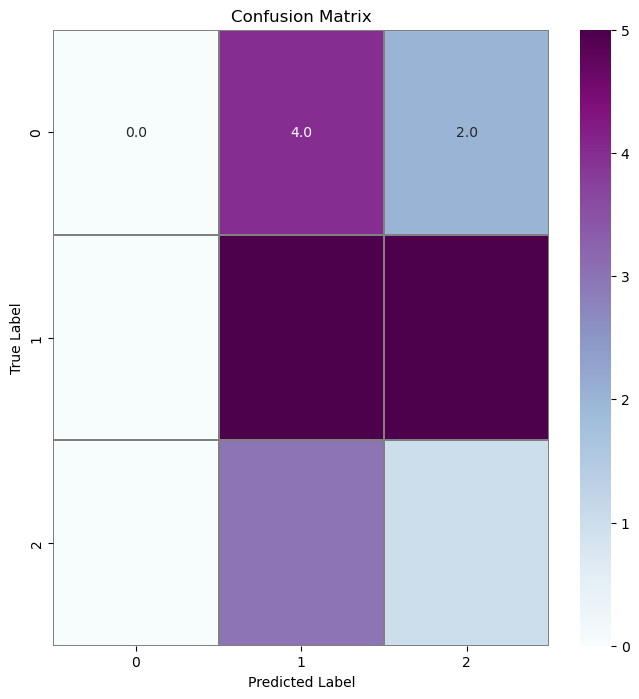

In [16]:
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

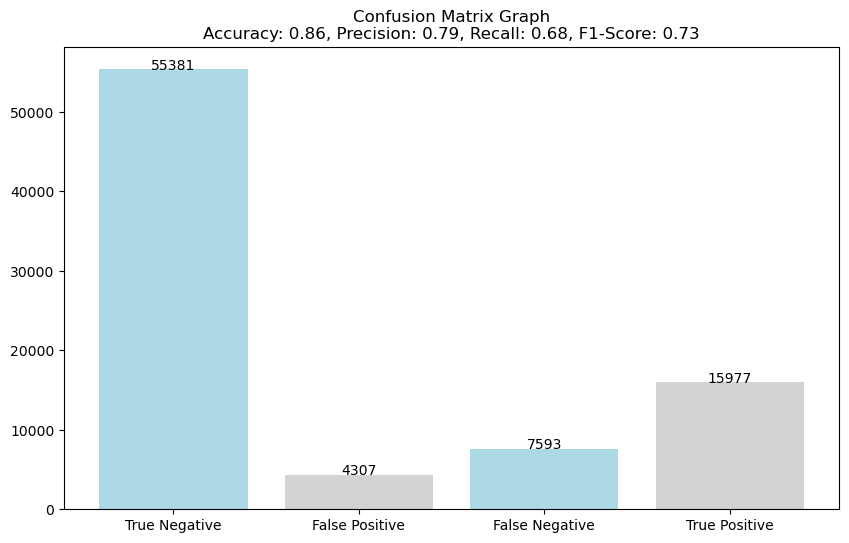

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Calculate confusion matrix and evaluation metrics
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
accuracy = accuracy_score(Y_true, Y_pred_classes)
precision = precision_score(Y_true, Y_pred_classes)
recall = recall_score(Y_true, Y_pred_classes)
f1 = f1_score(Y_true, Y_pred_classes)

# Define labels for the bars
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Plot the confusion matrix as a graph
plt.figure(figsize=(10, 6))

# Plot bars for each category with light colors
plt.bar(labels, [confusion_mtx[0, 0], confusion_mtx[0, 1], confusion_mtx[1, 0], confusion_mtx[1, 1]], color=['lightblue', 'lightgray', 'lightblue', 'lightgray'])

# Add text annotations for each bar
for i, v in enumerate([confusion_mtx[0, 0], confusion_mtx[0, 1], confusion_mtx[1, 0], confusion_mtx[1, 1]]):
    plt.text(i, v + 3, str(v), ha='center')

# Add evaluation metrics to the title
plt.title(f"Confusion Matrix Graph\nAccuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")

plt.show()


In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Calculate confusion matrix and evaluation metrics
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
accuracy = accuracy_score(Y_true, Y_pred_classes)
precision = precision_score(Y_true, Y_pred_classes)
recall = recall_score(Y_true, Y_pred_classes)
f1 = f1_score(Y_true, Y_pred_classes)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Accuracy: 0.86
Precision: 0.79
Recall: 0.68
F1-Score: 0.73


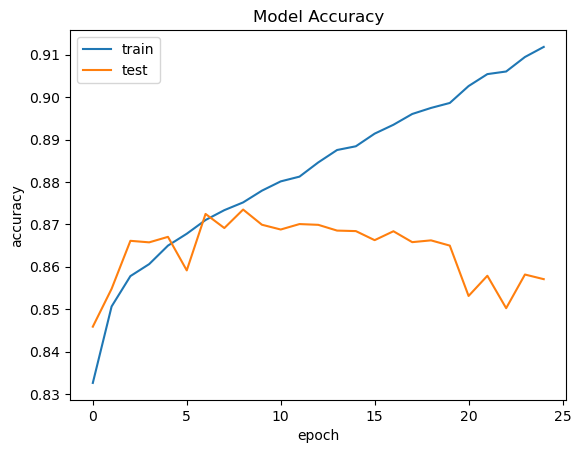

In [65]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

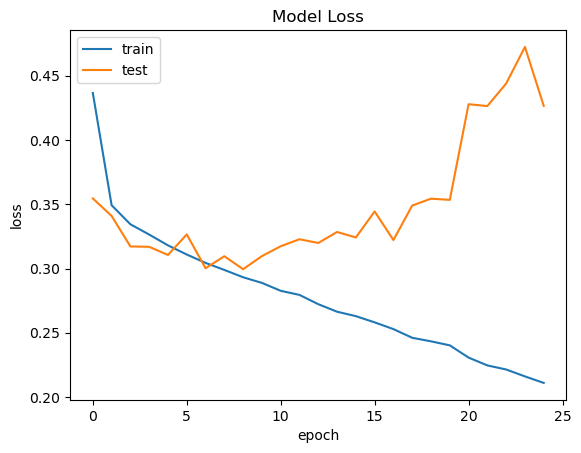

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [56]:
prediction = model.predict(X_test)
prediction

2602/2602 ━━━━━━━━━━━━━━━━━━━━ 69s 27ms/step


array([[6.44321442e-02, 9.35567856e-01],
       [9.99998212e-01, 1.82278154e-06],
       [9.99888659e-01, 1.11377565e-04],
       ...,
       [2.08962956e-04, 9.99791086e-01],
       [4.23056148e-02, 9.57694411e-01],
       [9.99974608e-01, 2.54460119e-05]], dtype=float32)

In [57]:
def img_plot(arr,index=0):
    plt.title('Test Image')
    plt.imshow(arr[index])

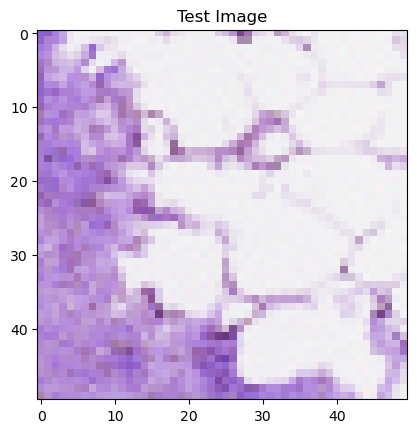

In [58]:
index = 90
img_plot(X_test, index)

In [59]:
input = X_test[index:index+1]

In [60]:
pred = model.predict(input)[0].argmax()
label = y_test[index].argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [61]:
print('Predicted Value using  cnn model',pred)
print("True Value",label)

Predicted Value using  cnn model 0
True Value 0


In [ ]:
# Random Forest 

In [18]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# For simplicity, let's select only two classes (e.g., class 0 and class 1) to make it a binary classification problem
class_0 = 0
class_1 = 1

# Filter the dataset to include only the selected classes
train_filter = np.where((y_train == class_0) | (y_train == class_1))[0]
test_filter = np.where((y_test == class_0) | (y_test == class_1))[0]

X_train, y_train = X_train[train_filter], y_train[train_filter]
X_test, y_test = X_test[test_filter], y_test[test_filter]

# Flatten the images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Standardize the features
scaler = StandardScaler()
X_train_flat = scaler.fit_transform(X_train_flat)
X_test_flat = scaler.transform(X_test_flat)


In [19]:
# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=100)



In [20]:
# Train the model
rf_model.fit(X_train_flat, y_train.ravel())


RandomForestClassifier(random_state=100)

Accuracy: 88.75%


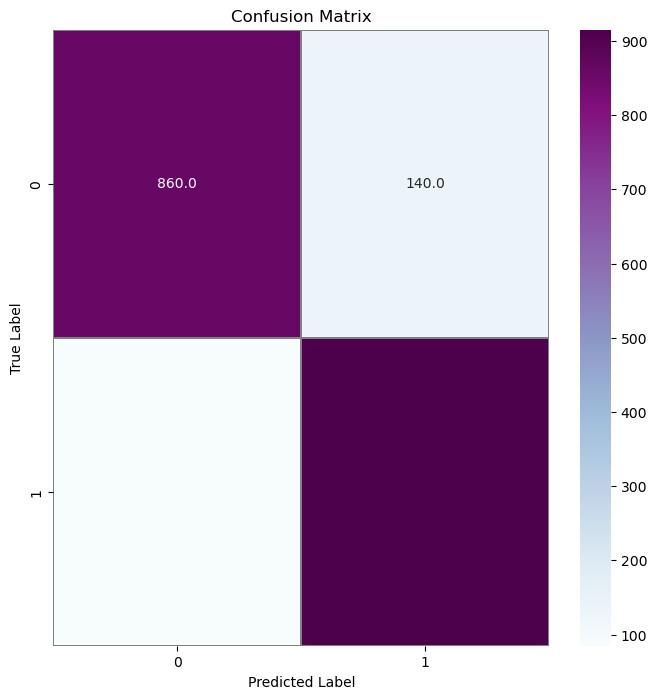

In [21]:
# Evaluate the model
accuracy = rf_model.score(X_test_flat, y_test.ravel())
print(f'Accuracy: {accuracy * 100:.2f}%')

# Predicting the test set results
Y_pred = rf_model.predict(X_test_flat)

# Confusion matrix
confusion_mtx = confusion_matrix(y_test, Y_pred)

# Plotting the confusion matrix
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="BuPu", linecolor="gray", fmt='.1f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


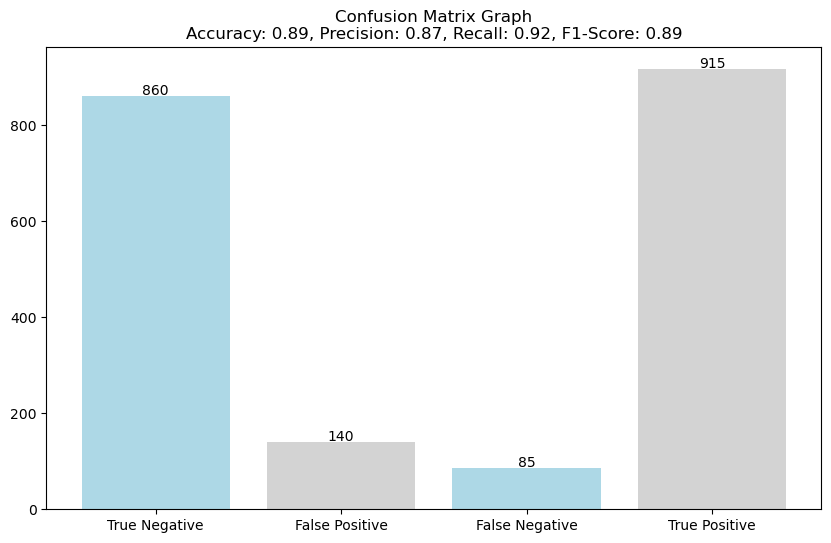

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# Calculate confusion matrix and evaluation metrics
confusion_mtx = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred)
recall = recall_score(y_test, Y_pred)
f1 = f1_score(y_test, Y_pred)

labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
plt.figure(figsize=(10, 6))
plt.bar(labels, [confusion_mtx[0, 0], confusion_mtx[0, 1], confusion_mtx[1, 0], confusion_mtx[1, 1]], color=['lightblue', 'lightgray', 'lightblue', 'lightgray'])
for i, v in enumerate([confusion_mtx[0, 0], confusion_mtx[0, 1], confusion_mtx[1, 0], confusion_mtx[1, 1]]):
    plt.text(i, v + 3, str(v), ha='center')
plt.title(f"Confusion Matrix Graph\nAccuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")
plt.show()


In [23]:
# Calculate confusion matrix and evaluation metrics
confusion_mtx = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred)
recall = recall_score(y_test, Y_pred)
f1 = f1_score(y_test, Y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')



Accuracy: 0.89
Precision: 0.87
Recall: 0.92
F1-Score: 0.89


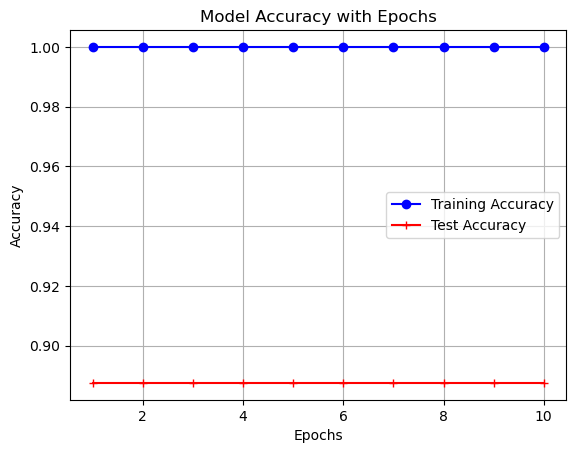

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# For simplicity, let's select only two classes (e.g., class 0 and class 1) to make it a binary classification problem
class_0 = 0
class_1 = 1

# Filter the dataset to include only the selected classes
train_filter = np.where((y_train == class_0) | (y_train == class_1))[0]
test_filter = np.where((y_test == class_0) | (y_test == class_1))[0]

X_train, y_train = X_train[train_filter], y_train[train_filter]
X_test, y_test = X_test[test_filter], y_test[test_filter]

# Flatten the images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Standardize the features
scaler = StandardScaler()
X_train_flat = scaler.fit_transform(X_train_flat)
X_test_flat = scaler.transform(X_test_flat)

# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=100)

# Train the model and store accuracy for each epoch
train_accuracy = []
test_accuracy = []
epochs = 10

for epoch in range(1, epochs + 1):
    # Train the model for one epoch
    rf_model.fit(X_train_flat, y_train.ravel())

    # Evaluate the model on training data
    train_pred = rf_model.predict(X_train_flat)
    train_acc = accuracy_score(y_train, train_pred)
    train_accuracy.append(train_acc)

    # Evaluate the model on testing data
    test_pred = rf_model.predict(X_test_flat)
    test_acc = accuracy_score(y_test, test_pred)
    test_accuracy.append(test_acc)

# Plotting Model Accuracy graph with epochs
plt.plot(range(1, epochs + 1), train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(range(1, epochs + 1), test_accuracy, 'r+-', label='Test Accuracy')
plt.title('Model Accuracy with Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


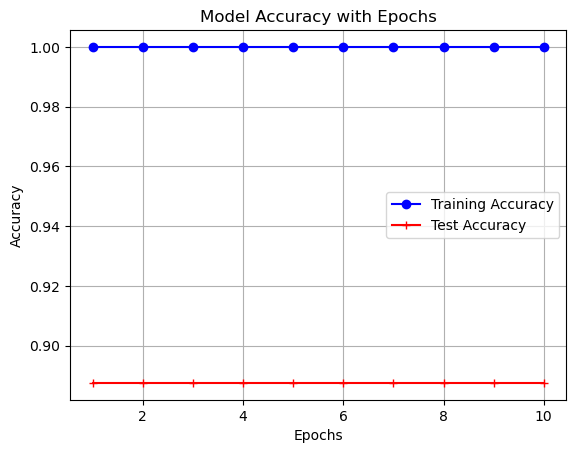

In [30]:
# Plotting Model Accuracy graph with epochs
plt.plot(range(1, epochs + 1), train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(range(1, epochs + 1), test_accuracy, 'r+-', label='Test Accuracy')
plt.title('Model Accuracy with Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# Plotting Model Accuracy graph with epochs
history = History()

# Train the model and store history
rf_model.fit(X_train_flat, y_train.ravel(), callbacks=[history])

epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'], 'bo', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'r', label='Test Accuracy')
plt.title('Model Accuracy with Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


TypeError: BaseForest.fit() got an unexpected keyword argument 'callbacks'